# Brain Wide Map Coverage Example
In this example we will compute the coverage of the current Brain Wide Map dataset and then display it as a 3D volume. We'll also position the camera so that you can animate the scene and record the brain rotating.

In [33]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt
import sys
import unityneuro.render as urn

## Set up the Unity Renderer for Neuroscience and open the renderer webpage

In [35]:
urn.close()

(URN) disconnected from server


In [36]:
urn.setup(standalone=True)

(URN) connected to server
Login sent with ID: Dan


## Build the coverage map

In [37]:
from needles2.probe_model import ProbeModel

# we'll use the 25um atlas
res = 25
pr = ProbeModel(res=res)
pr.initialise()
pr.compute_best_for_provenance(provenance='Histology track')
# we'll compute coverage assuming each probe covers a 100um window?
coverage = pr.report_coverage(provenance='Best', dist=300)
# by default this comes out in ap/ml/dv, swap to ap/dv/lr
coverage = coverage.swapaxes(1,2)

13.97002649307251
12.711416006088257
0.03515338897705078
22.444529056549072
0.02453136444091797
0.01300358772277832
0.280397891998291
0.06270051002502441
0.0
0.03656307129798903
0.07312614259597806
0.10968921389396709
0.14625228519195613
0.18281535648994515
0.21937842778793418
0.25594149908592323
0.29250457038391225
0.3290676416819013
0.3656307129798903
0.40219378427787933
0.43875685557586835
0.4753199268738574
0.5118829981718465
0.5484460694698354
0.5850091407678245
0.6215722120658135
0.6581352833638026
0.6946983546617916
0.7312614259597806
0.7678244972577697
0.8043875685557587
0.8409506398537477
0.8775137111517367
0.9140767824497258
0.9506398537477148
0.9872029250457038


### Convenience functions to save/load the volume if you want to save time

In [38]:
# np.save('./data/gaelle/coverage.npy',coverage)

In [ ]:
#coverage = np.load('./data/gaelle/coverage.npy')

## Plot a test slice to make sure the coverage computed properly

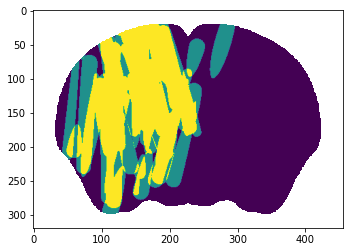

In [39]:
plt.imshow(coverage[240,:,:])

## Send to URN for display (can take a minute or two)

In [40]:
urn.clear()
urn.create_volume("coverage")
urn.set_volume_colormap("coverage", ["#00000080", "#FFFF00FF", "#00FF00FF"])
urn.set_volume_data("coverage", coverage)
urn.set_volume_visibility("coverage",True)

(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


In [43]:
# set the camera angle for making a rotation video
urn.set_camera_rotation([45,0,0])

packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan
(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan
(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan
(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan
(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan
